## Importing the required libraries

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

## Loading the dataset

In [96]:
file_path = "./house_prices_dataset.csv"
df = pd.read_csv(file_path)
df

,Location,Size_sqft,Bedrooms,Bathrooms,House_Age,Garage,Pool,Distance_to_City_Center_miles,Price
0,Chicago,1395,3,1,26,1,0,12.077516,7.257565e+05
1,Houston,1528,4,2,28,1,0,22.750817,7.264075e+05
2,Los Angeles,2165,4,4,46,1,0,27.593580,1.050788e+06
3,Houston,1498,5,3,27,1,0,28.552394,7.240178e+05
4,Houston,1195,5,4,34,1,1,17.525116,7.342087e+05
...,...,...,...,...,...,...,...,...,...
495,New York,4475,3,4,14,1,1,22.624345,1.917976e+06
496,Los Angeles,3854,3,4,16,1,1,27.292740,1.643563e+06
497,New York,2943,1,1,39,1,0,22.882102,1.270751e+06
498,New York,2111,1,4,17,0,0,18.116082,1.127655e+06


## Preprocessing and Handling the Missing Values

In [97]:
# dropping the duplicate rows and any missing values
df.drop_duplicates(inplace=True)
df.dropna(inplace= True)
df

,Location,Size_sqft,Bedrooms,Bathrooms,House_Age,Garage,Pool,Distance_to_City_Center_miles,Price
0,Chicago,1395,3,1,26,1,0,12.077516,7.257565e+05
1,Houston,1528,4,2,28,1,0,22.750817,7.264075e+05
2,Los Angeles,2165,4,4,46,1,0,27.593580,1.050788e+06
3,Houston,1498,5,3,27,1,0,28.552394,7.240178e+05
4,Houston,1195,5,4,34,1,1,17.525116,7.342087e+05
...,...,...,...,...,...,...,...,...,...
495,New York,4475,3,4,14,1,1,22.624345,1.917976e+06
496,Los Angeles,3854,3,4,16,1,1,27.292740,1.643563e+06
497,New York,2943,1,1,39,1,0,22.882102,1.270751e+06
498,New York,2111,1,4,17,0,0,18.116082,1.127655e+06


## Encoding the categorical variable (Location)

In [98]:
# encoding the categorical variables using OneHotEncoder 
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_location = encoder.fit_transform(df[['Location']])
#converting the encoded location into dataframe with proper columns
encoded_location_df = pd.DataFrame(encoded_location, columns = encoder.get_feature_names_out(['Location']))
# adding the encoded location (categorical feature) to the dataframe
df = df.drop( columns= ['Location'])
df = pd.concat([df, encoded_location_df], axis  = 1)
df

,Size_sqft,Bedrooms,Bathrooms,House_Age,Garage,Pool,Distance_to_City_Center_miles,Price,Location_Houston,Location_Los Angeles,Location_New York,Location_San Francisco
0,1395,3,1,26,1,0,12.077516,7.257565e+05,0.0,0.0,0.0,0.0
1,1528,4,2,28,1,0,22.750817,7.264075e+05,1.0,0.0,0.0,0.0
2,2165,4,4,46,1,0,27.593580,1.050788e+06,0.0,1.0,0.0,0.0
3,1498,5,3,27,1,0,28.552394,7.240178e+05,1.0,0.0,0.0,0.0
4,1195,5,4,34,1,1,17.525116,7.342087e+05,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
495,4475,3,4,14,1,1,22.624345,1.917976e+06,0.0,0.0,1.0,0.0
496,3854,3,4,16,1,1,27.292740,1.643563e+06,0.0,1.0,0.0,0.0
497,2943,1,1,39,1,0,22.882102,1.270751e+06,0.0,0.0,1.0,0.0
498,2111,1,4,17,0,0,18.116082,1.127655e+06,0.0,0.0,1.0,0.0


## Scaling the data


In [99]:
# scaling the data using StandardScaler
X = df.drop(columns=['Price'])
y = df['Price']
X_scaled = StandardScaler().fit_transform(X)


## Splitting into Train and Test data

In [100]:
# splitting the data into train and test in 80 / 20 ratio 
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## Exploratory data analysis

### 1.scatter plots between features and the house prices

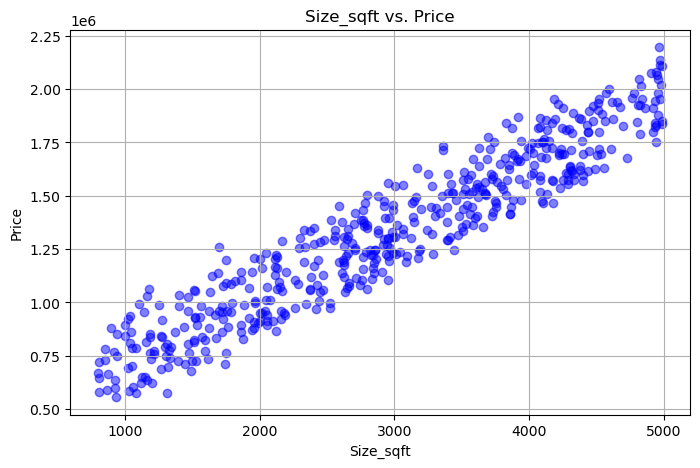

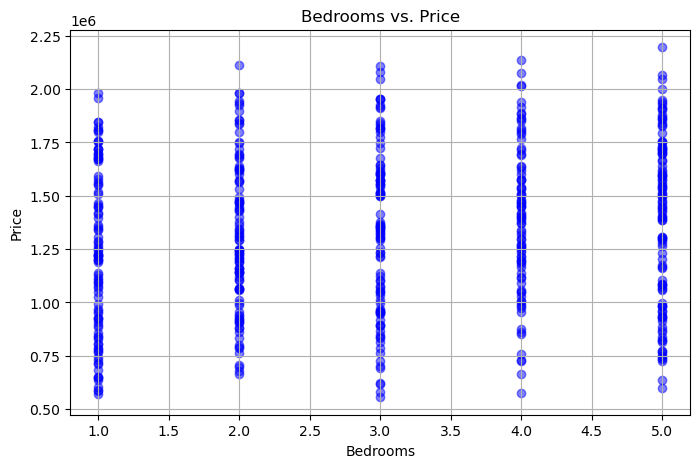

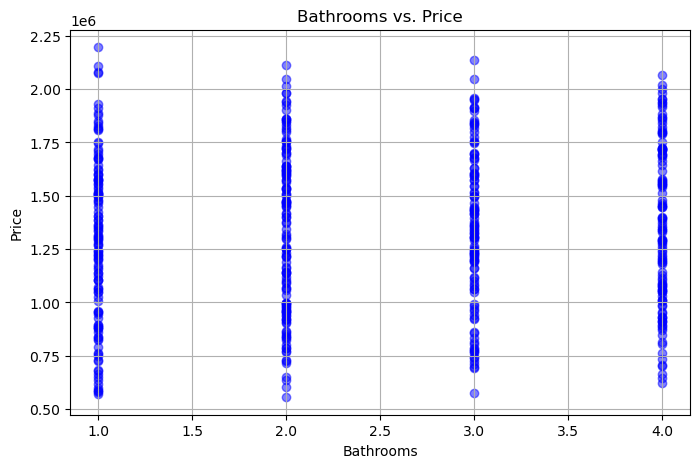

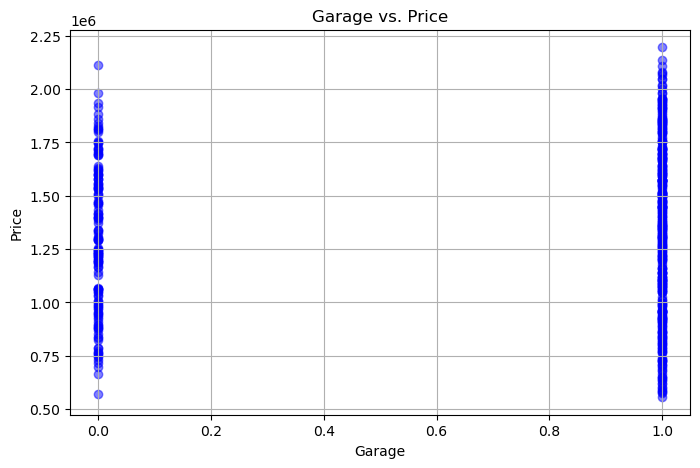

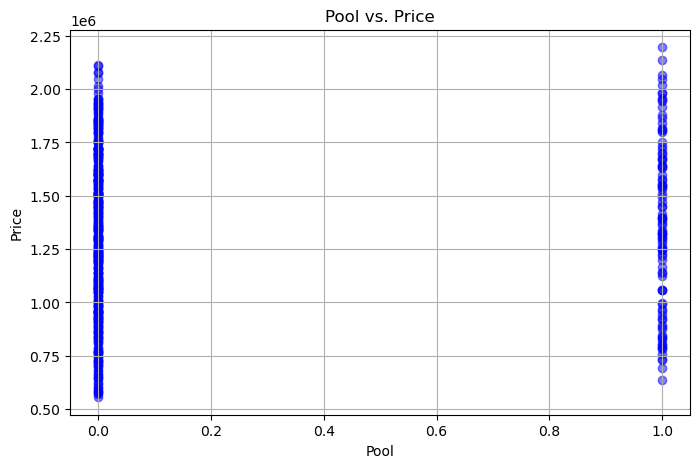

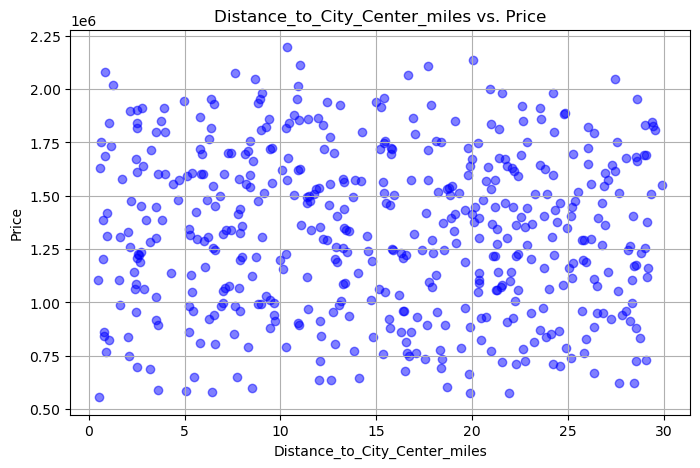

In [101]:
# using scatter plot to understand the trends
features = ['Size_sqft', 'Bedrooms', 'Bathrooms', 'Garage', 'Pool', 'Distance_to_City_Center_miles']

for col in features:
    plt.figure(figsize=(8, 5))
    plt.scatter(df[col], df['Price'], alpha=0.5, color='blue')
    plt.title(f"{col} vs. Price")
    plt.xlabel(col)
    plt.ylabel("Price")
    plt.grid(True)
    plt.show()


### 2.Histogram of the house prices

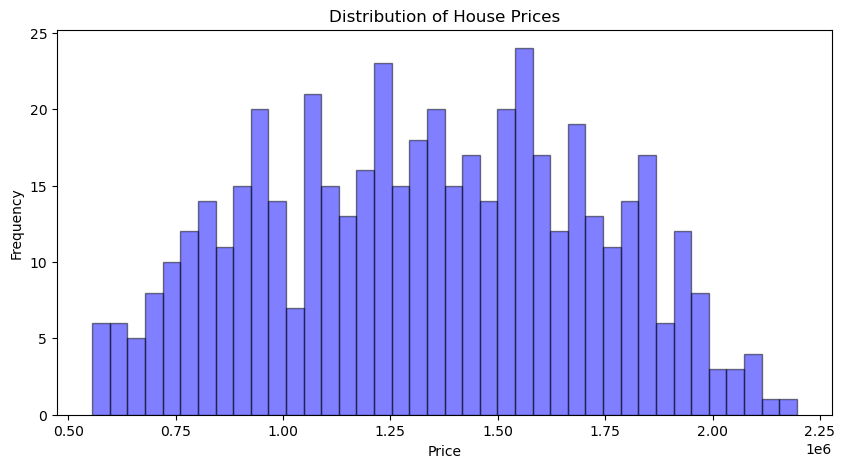

In [102]:
plt.figure(figsize=(10, 5))
plt.hist(df['Price'], bins=40, color='blue', edgecolor='black', alpha=0.5)
plt.title("Distribution of House Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

### 3.Info about various statical measures of the given dataset

In [108]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Size_sqft                      500 non-null    int64  
 1   Bedrooms                       500 non-null    int64  
 2   Bathrooms                      500 non-null    int64  
 3   House_Age                      500 non-null    int64  
 4   Garage                         500 non-null    int64  
 5   Pool                           500 non-null    int64  
 6   Distance_to_City_Center_miles  500 non-null    float64
 7   Price                          500 non-null    float64
 8   Location_Houston               500 non-null    float64
 9   Location_Los Angeles           500 non-null    float64
 10  Location_New York              500 non-null    float64
 11  Location_San Francisco         500 non-null    float64
dtypes: float64(6), int64(6)
memory usage: 47.0 KB


,Size_sqft,Bedrooms,Bathrooms,House_Age,Garage,Pool,Distance_to_City_Center_miles,Price,Location_Houston,Location_Los Angeles,Location_New York,Location_San Francisco
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,5.000000e+02,500.000000,500.000000,500.000000,500.000000
mean,2971.950000,3.008000,2.458000,23.458000,0.702000,0.194000,15.200508,1.329449e+06,0.186000,0.182000,0.218000,0.190000
std,1169.733097,1.428291,1.114774,14.209435,0.457838,0.395825,8.373759,3.780628e+05,0.389496,0.386231,0.413301,0.392694
min,803.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.500343,5.558926e+05,0.000000,0.000000,0.000000,0.000000
25%,2005.000000,2.000000,1.000000,11.000000,0.000000,0.000000,7.903742,1.029014e+06,0.000000,0.000000,0.000000,0.000000
50%,2956.000000,3.000000,2.000000,23.000000,1.000000,0.000000,15.467201,1.336224e+06,0.000000,0.000000,0.000000,0.000000
75%,3980.500000,4.000000,3.000000,35.000000,1.000000,0.000000,22.237744,1.619568e+06,0.000000,0.000000,0.000000,0.000000
max,4988.000000,5.000000,4.000000,49.000000,1.000000,1.000000,29.916879,2.196013e+06,1.000000,1.000000,1.000000,1.000000


# Training the data using different models

## 1.Linear Regression

In [103]:
# using linear regression to train
model1 = LinearRegression()
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)

# performance metrics of linear regression
print("RMSE_LINEAR_REGRESSION : ", np.sqrt(mean_squared_error(y_pred1, y_test)))
print("MAE_LINEAR_REGRESSION : ", mean_absolute_error(y_pred1, y_test))
print("R2_SCORE_LINEAR_REGRESSION : ", r2_score(y_pred1, y_test))

RMSE_LINEAR_REGRESSION :  11719.545666352768
MAE_LINEAR_REGRESSION :  10334.125078503075
R2_SCORE_LINEAR_REGRESSION :  0.998960835812596


## 2.Neural Networks

In [104]:
# using multi layer feed forward network to train 
model2 = MLPRegressor(hidden_layer_sizes= (100, 50),activation='relu' ,solver='adam', max_iter= 500, random_state= 42)
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)

# calculating performance metrics of neural networks
print("RMSE_NEURAL_NETWORKS : ", np.sqrt(mean_squared_error(y_pred2, y_test)))
print("MAE_NEURAL_NETWOKS : ", mean_absolute_error(y_pred2, y_test))
print("R2_SCORE_NEURAL_NETWORKS : ", r2_score(y_pred2, y_test))


RMSE_NEURAL_NETWORKS :  1369368.162748587
MAE_NEURAL_NETWOKS :  1323044.0458968843
R2_SCORE_NEURAL_NETWORKS :  -8266.788117091606


/usr/lib/python3/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


## 3.Decision Tree

In [105]:
# using decision tree to train
model3 = DecisionTreeRegressor()
model3.fit(X_train, y_train)
y_pred3 = model3.predict(X_test)

# calculating performance metrics of decision tree
print("RMSE_DECISION_TREE : ", np.sqrt(mean_squared_error(y_pred3, y_test)))
print("MAE_DECISION_TREE : ", mean_absolute_error(y_pred3, y_test))
print("R2_SCORE_DECISION_TREE : ", r2_score(y_pred3, y_test))

RMSE_DECISION_TREE :  91841.89581855651
MAE_DECISION_TREE :  74880.42626300002
R2_SCORE_DECISION_TREE :  0.9390259587806761
